In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
# !pip install music21
!pip install pebble

  Using cached Pebble-4.6.1-py2.py3-none-any.whl (25 kB)
You should consider upgrading via the '/Users/arpitha/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [4]:
from musicautobot.numpy_encode import *
from musicautobot.config import *

In [7]:
from musicautobot.utils.file_processing import process_all, process_file

In [17]:
from musicautobot.music_transformer import *
from musicautobot.multitask_transformer import *

# Generate Music with Pretrained Model

### Load Pretrained

In [22]:
# Config
config = multitask_config();

# Location of your midi files
midi_path =  Path('data/midi')

# Location of saved datset
data_path = Path('data/numpy')
data_save_name = 'musicitem_data_save.pkl'

In [23]:
# Data
data = MusicDataBunch.empty(data_path)
vocab = data.vocab

In [26]:
# Pretrained Model

# Download pretrained model if you haven't already
pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MultitaskSmallKeyC.pth'
# pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MultitaskSmall.pth'

pretrained_path = data_path/'pretrained'/Path(pretrained_url).name
download_url(pretrained_url, dest=pretrained_path)

In [27]:
# Learner
learn = multitask_model_learner(data, pretrained_path=pretrained_path)
# learn.to_fp16();

In [28]:
### Choose existing midi file as a starting point

In [30]:
example_dir = midi_path/'examples'
midi_files = get_files(example_dir, recurse=True, extensions='.mid'); midi_files[:5]

[PosixPath('data/midi/examples/Levels - Avicii - Verse.mid'),
 PosixPath('data/midi/examples/Scary Monsters And Nice Sprites - Skrillex - Pre-Chorus.mid'),
 PosixPath('data/midi/examples/Can You Feel The Love Tonight - Elton John - Verse.mid'),
 PosixPath('data/midi/examples/Locked Out Of Heaven - Bruno Mars - Chorus.mid'),
 PosixPath('data/midi/examples/In The Hall Of The Mountain King - Edvard Grieg - Intro.mid')]

In [44]:
file = midi_files[0]; file

PosixPath('data/midi/examples/Levels - Avicii - Verse.mid')

In [45]:
# Encode file 
item = MusicItem.from_file(file, data.vocab)

x = item.to_tensor()
x_pos = item.get_pos_tensor()

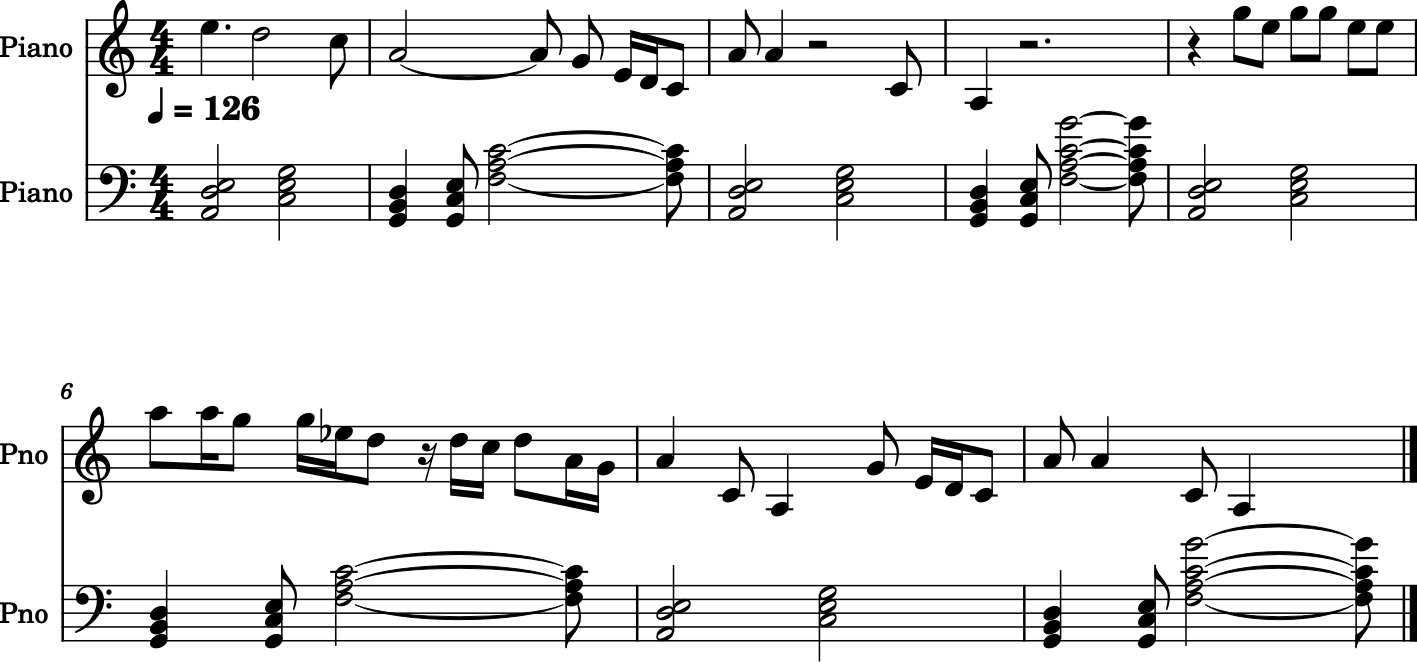

In [46]:
item.show()

In [47]:
item.play()

## Generate

MultitaskTransformer trains on 3 separate tasks. 
1. NextWord
2. Mask
3. Sequence to Sequence

## 1. NextWord/Autocomplete

Trim the song to only a few notes. Model will use these notes a seed and continue the idea

In [48]:
seed_len = 6 # 4 beats = 1 bar
seed = item.trim_to_beat(seed_len)

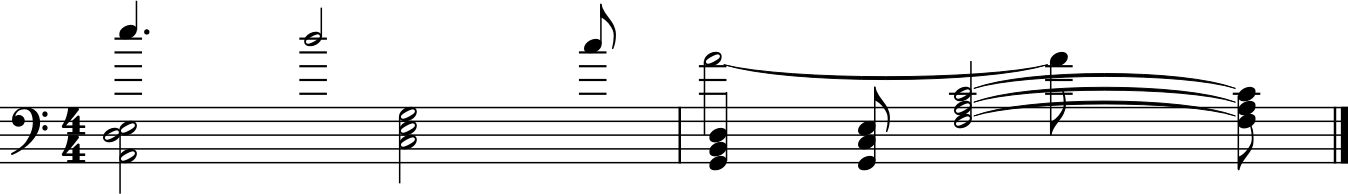

In [49]:
seed.show()

In [50]:
pred_nw, full = learn.predict_nw(seed, n_words=200)

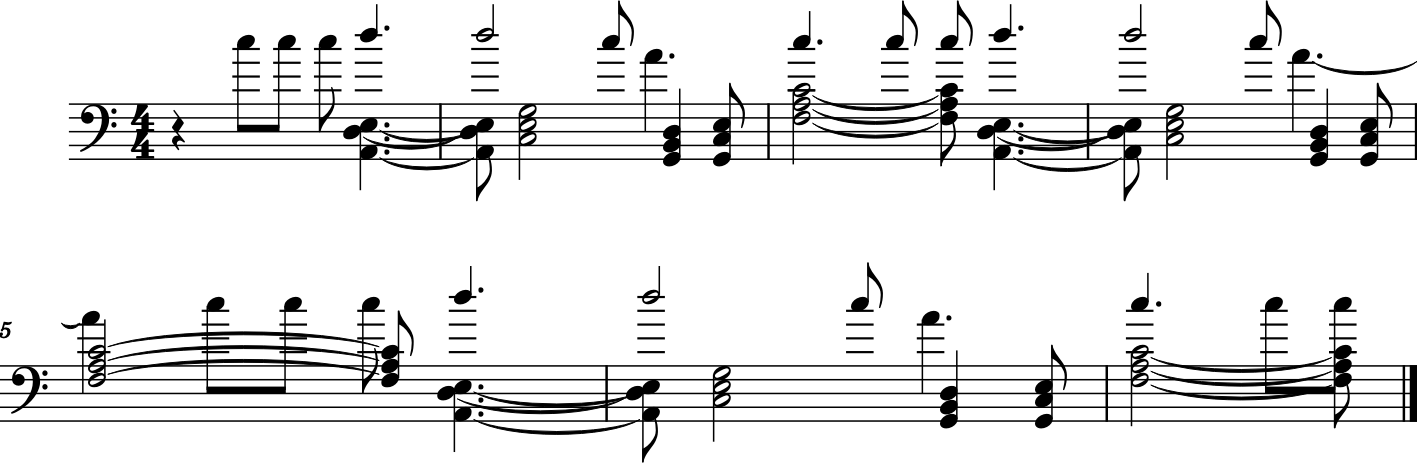

In [51]:
pred_nw.show()

In [52]:
pred_nw.play()

Add more randomness

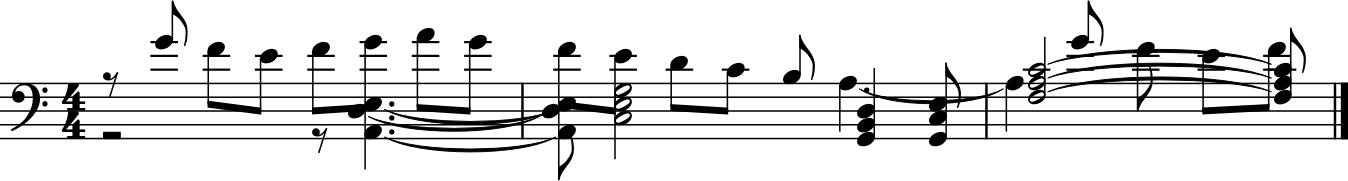

In [53]:
pitch_temp = 1.2 # randomness of melody
tempo_temp = 0.8 # randomness or rhythm
top_k = 40
pred_nw_rand, full = learn.predict_nw(seed, temperatures=(pitch_temp, tempo_temp), top_k=top_k, top_p=0.5)
pred_nw_rand.show()